# Workshop #1 

## The aim of this worksop is to make you manipulate 2 famous unsupervised Learning method in order to get insight in data which are clustering and PCA

### Clustering
In machine learning too, we often group examples as a first step to understand a subject (data set) in a machine learning system.

Some common applications for clustering include the following:

- market segmentation
- social network analysis
- search result grouping
- medical imaging
- image segmentation
- anomaly detection

We can also use Clusters for supervised Learning. In fact, we can perform regression (or classification) in each cluster where we know that observations are similar.

To perform a clustering, it is better to scale your data in order to have reliable cluters.

Many clustering algorithms exist but here we will use 3:
- Kmeans clustering
- Hierarchical clustering
- DBScan

#### Kmeans clustering
Kmeans clustering try to build groups using 2 main step after chosing the number of cluster:
- Choose the initial center of clusters
- Add each point to the closest cluster ( eachtime a point is added, it computes the gravity center of the cluster)

#### Hierarchical clustering
Hierarchical clustering is a simple but effective algorithm but has one "big" disadvantage, its time complexity. In fact, hierarchical clustering build cluster buy computing the distance between all points 2 by 2 and then assemble points that are closer. It will do it successively until we obtain the number of cluster we need.

We will illustrate this by applying these algorithms on real data


#### DBScan
DBScan algorithm is a good algorithm that can natively find outliers (HC can too with good parameters). It measures the density of a point a assign it a "role":
- Core point
- Border point
- Noise point


#### You can find below the first clustering tips&tricks slide on clustering

![title](img/clus1.png)

#### For this first clustering analysis, we will use a city dataset. The dataset gives temperature information of Frances big cities by month. Each row is a city and each column is a month. The goal is to apply clustering on this dataset to find groups of city that are similar.

### Import the data set and check how it is built. Store numerical data and non-numerical data in two differents variable.

In [1]:
import pandas as pd
import numpy as np
city = pd.read_csv('villes.csv',sep=';')
city.head()

cities = city.ville
temp = city.drop('ville',axis=1)


#### Before applying a clustering, we usually need to scale our data. Here, you can apply clustering without scaling the data as each column has already the same scale and unit. But as a training, we will do it anyway.

### Scaling

#### To scale the data we acan use two differents methods which are StandardScaler and MinMaxScaler. You will see the differences in next data science tips&tricks. 

### Scale the data

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(temp)

### Apply the kmeans with a random k and evaluate it using silhouette

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
KM = KMeans(n_clusters = 3)
KM.fit(X_norm)
clus = KM.labels_
silhouette_score(X_norm,clus)

#Find the best number of cluster

for i in range(2,6):
    KM = KMeans(n_clusters = i)
    KM.fit(X_norm)
    clus = KM.labels_
    print(silhouette_score(X_norm,clus))
    
#Try to lauch it many times, what we we see is that of course 2 cluster has the highest silhouette (almost always the case)
#But it is maybe not the best case we are looking for (we need more specifics clusters). What we can see is that 3 clusters is 
#always around 0.38 which the best among 3/4/5 clusters in average.
#We can then choose 3 clusters for the purpose of analysis and set a random_state in Kmeans to avoid randomness (feel free to do it again with 2 clusters)


KM = KMeans(n_clusters = 3,random_state=69)
KM.fit(X_norm)
clus = KM.labels_

0.625557719180767
0.38009843785854935
0.38137256123536883
0.3210577134301631


### Now that we computed the clustering, we need to vizualize

#### After doing our clustering, we want to to vizualize it in order to check if the algorithm have been able to seperate ou observations. As we have more than 2 columns, it is hard to know which one to use, thus, we will apply a PCA and take the first components as axis for the plot. 

#### Apply a pca and take at least 2 components, plot the components and set each points color according to its cluster and display the name of the point(city)

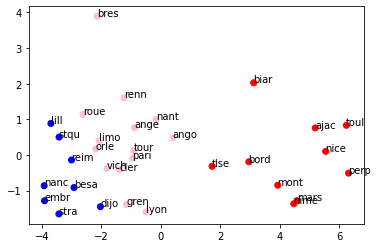

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_norm)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ['red','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
#We clearly see the 3 clusters bu we can also see that there is at least 1 outlier that we will try to determine with DBSCAN

### We can now try to create clusters using AgglomerativeClustering

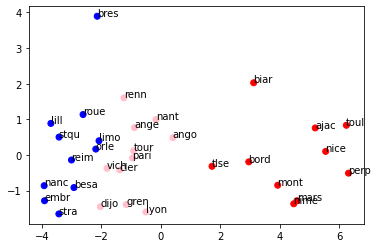

In [5]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3)
AC.fit(X_norm)
clus = AC.labels_
silhouette_score(X_norm,clus)

#1st and 2nd components of PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Change PCA components

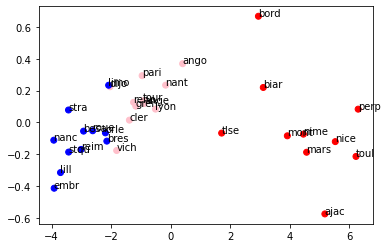

In [6]:
#1st and 3rd components of PCA
plt.scatter(X_pca[:, 0], X_pca[:, 2], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 2]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### We will try to change parameters of AC algorithms. In fact, there is a parameters called 'linkage' that tells the algorithm how to create clusters (défaut is 'ward')
    - ward: minimizes the variance of clusters being merged.
    - average: uses the average of the distances of each observation of the two sets.

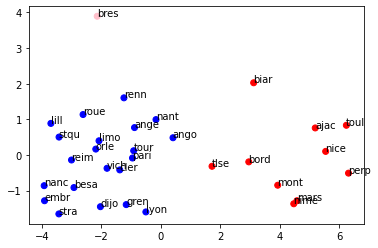

In [7]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3,linkage='average')
AC.fit(X_norm)
clus = AC.labels_
silhouette_score(X_norm,clus)

#1st and 2nd components of PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#We can see that using the average linkage which uses average distance of each point of clsuters to be merged create 3 clusters
#with brest alone as an 'outlier', we will try to reproduce it with the DBscan.

#### Now we will plot a dendogram to understande how the clsuters are build, how the points are merged

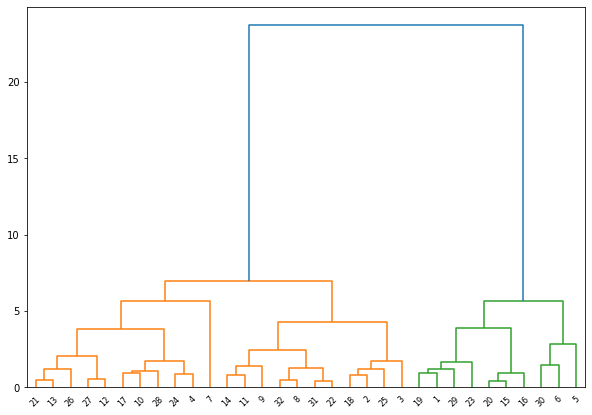

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_norm, 'ward',metric='euclidean')

labelList = range(1, X_norm.shape[0]+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Let's try to indentify ouliters with DBSCAN now
#### Don't hesitate to change min_samples and eps features of DB scan to identify the two outliers (bres and biar)

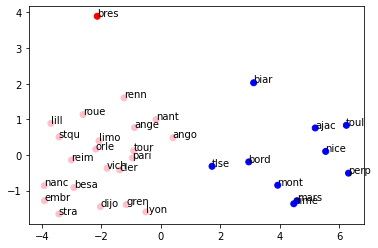

In [9]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(min_samples=4,eps=2.3)
DB.fit(X_norm)
clus = DB.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Let's now try to interpret clusters obtained with kmeans
#### To do so, we will use the logistic regression to fit a classification considering our clusters as target

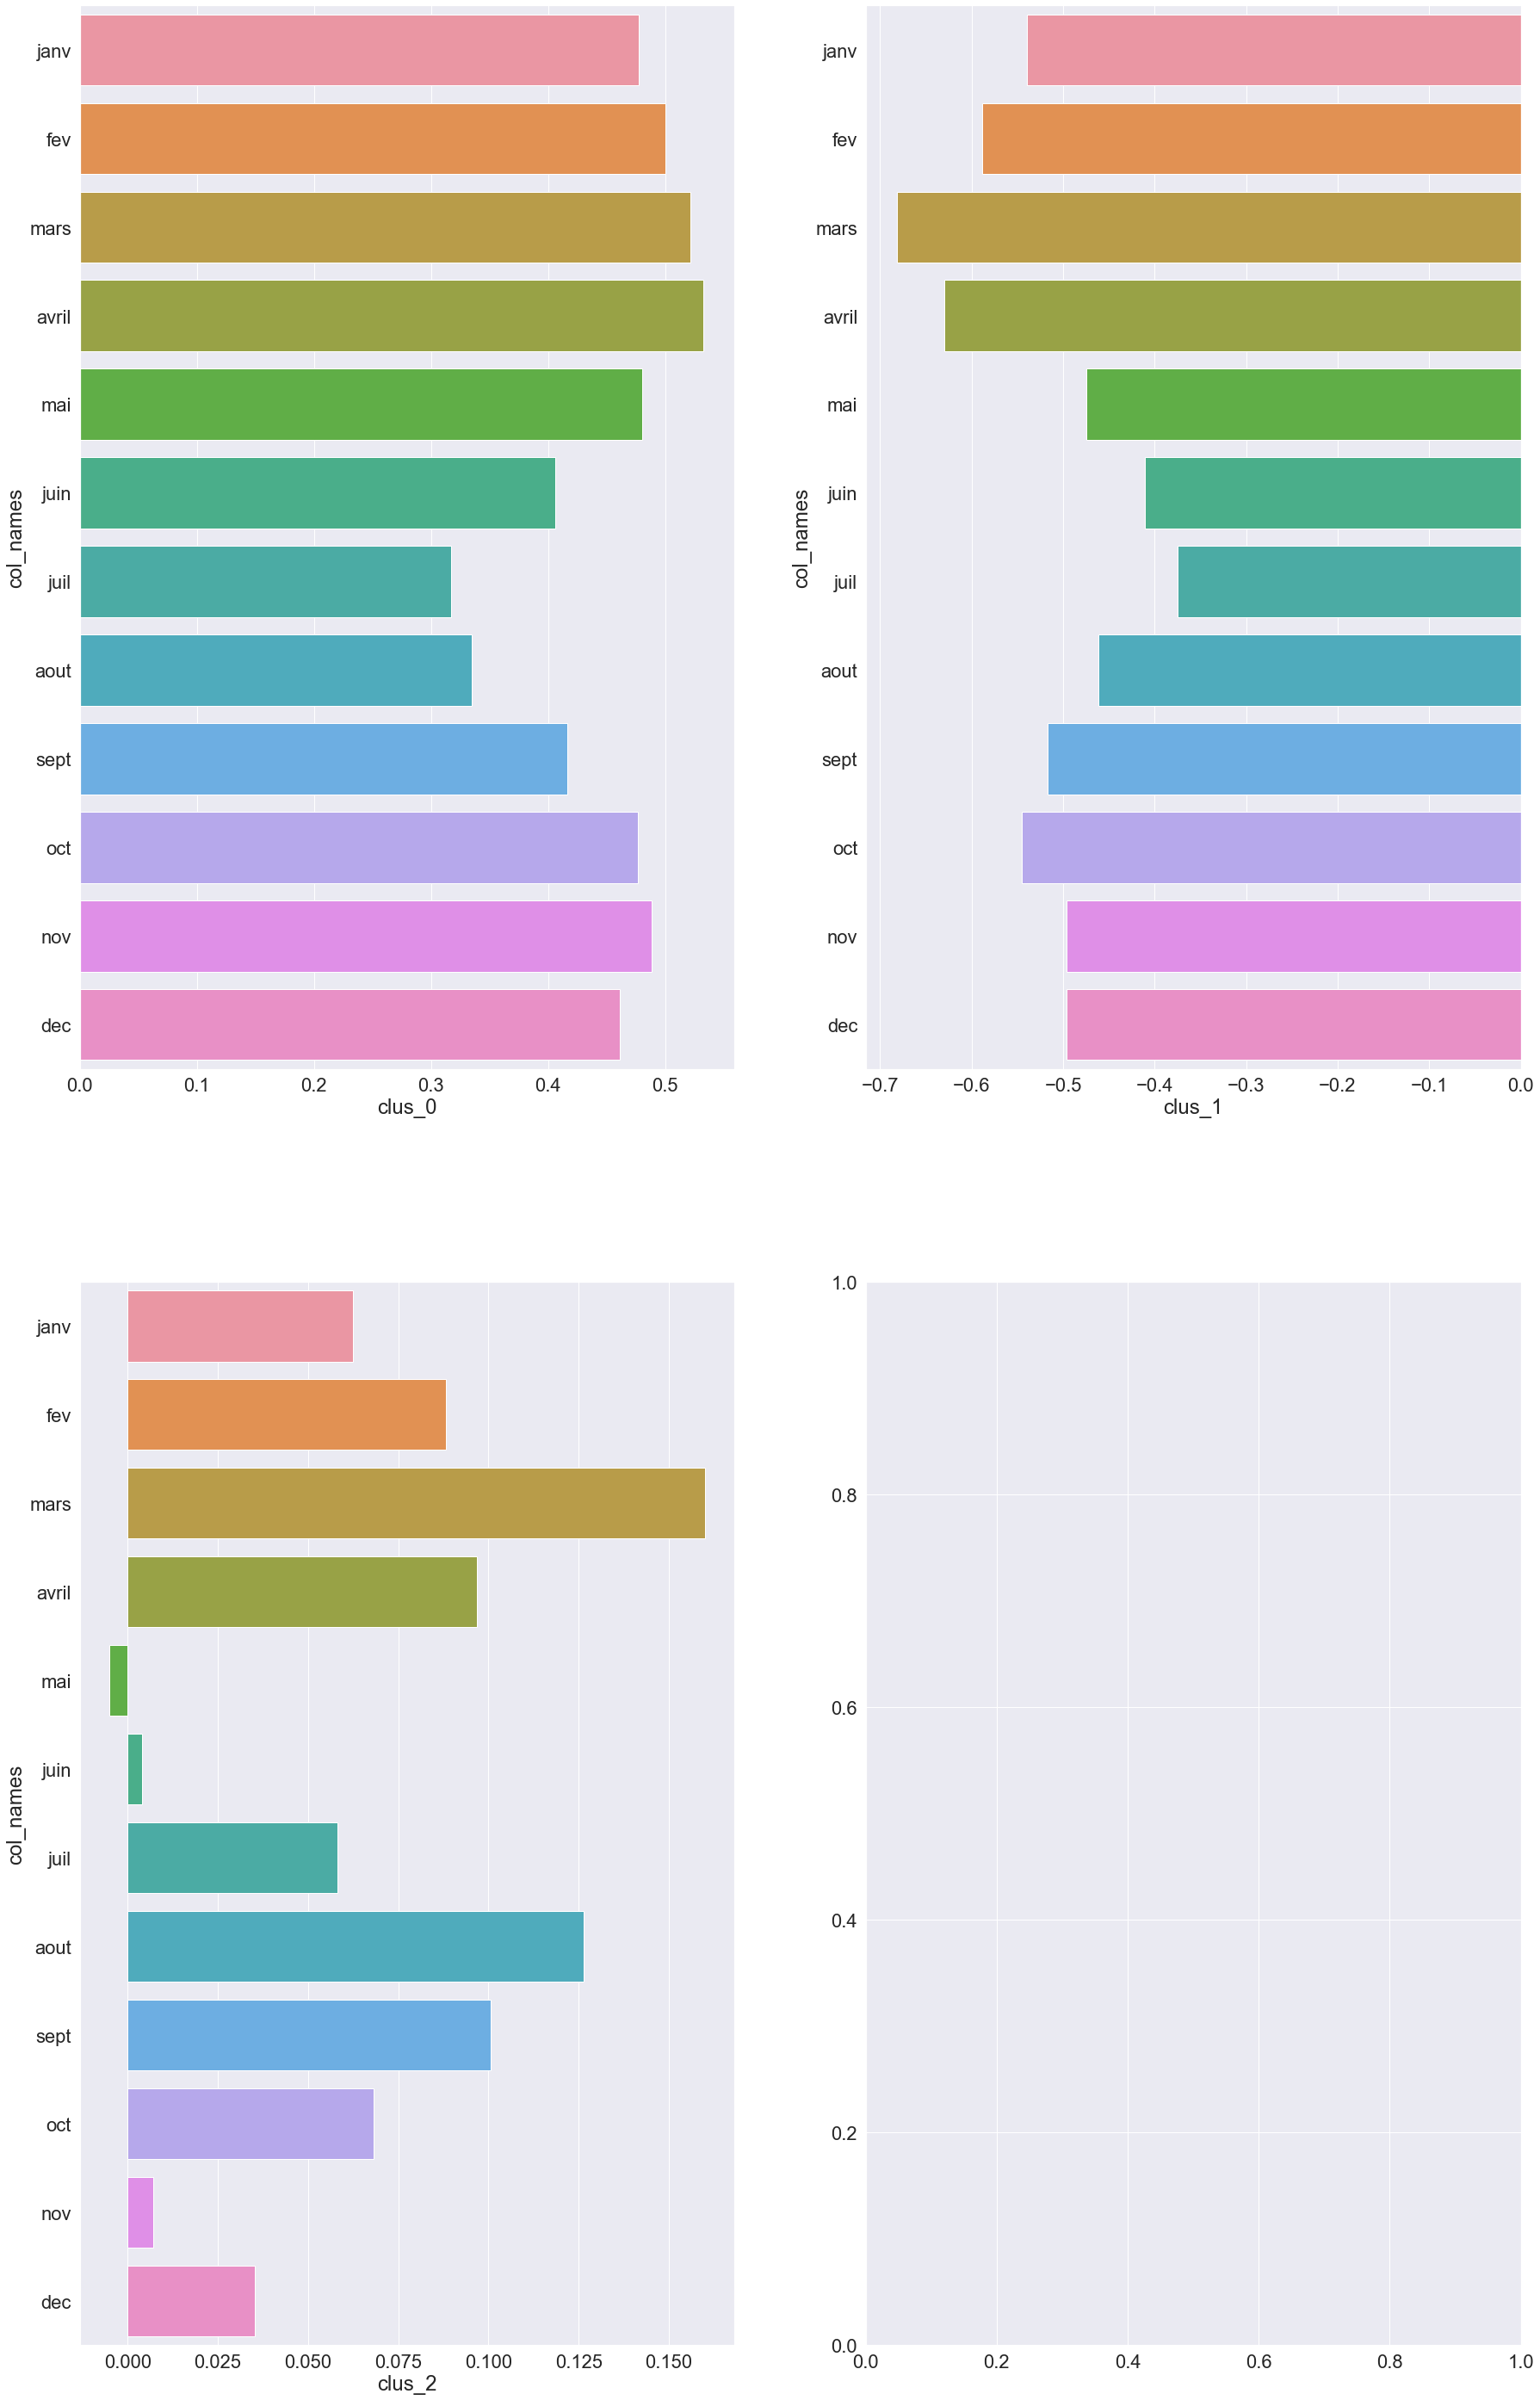

In [20]:
#We apply Kmeans
KM = KMeans(n_clusters = 3)
KM.fit(X_norm)
y = KM.labels_

#We apply the logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2')
LR.fit(X_norm,y)

#We vizualize our coefficients
import numpy as np
df_clusInter = pd.DataFrame(np.concatenate((city.columns.values.reshape(-1,1)[1:], LR.coef_.T),axis=1), 
                            columns=['col_names', 'clus_0', 'clus_1', 'clus_2'])

import seaborn as sb
sb.set(font_scale=2)
x_ax = 'col_names'
f, axes = plt.subplots(2,2,figsize=(30,50))
for i, ax in zip(range(0,3), axes.flat):
    sb.barplot(y=x_ax, x=df_clusInter.columns[1:].tolist()[i], data=df_clusInter,ax=ax)


#What we see is that in the first cluster we have cold cities, in the second we have hot cities and in the last one the others 
# which are the averages cities

#### We can check the cardinality

<BarContainer object of 3 artists>

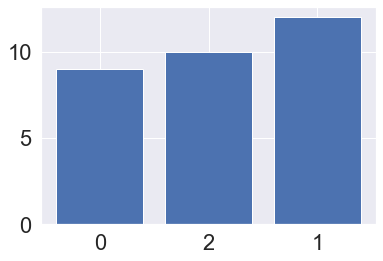

In [21]:
count = {i:y.tolist().count(i) for i in y}
plt.bar(range(len(count)), list(count.values()), tick_label=list(count.keys()))

#### And the magnitude

<AxesSubplot:xlabel='label'>

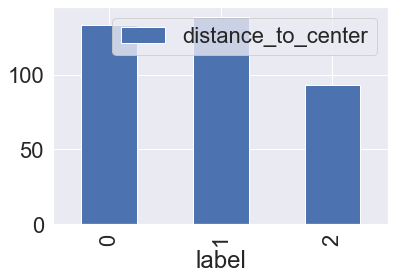

In [22]:
dist = KM.transform(X_norm).sum(axis=1)
df = pd.DataFrame(dist.round(2), columns=['distance_to_center'])
df['label'] = KM.labels_
df.groupby('label').sum().plot(kind='bar')

#### Now that we interpreted, we can check for more information about clusters. Here we can check the average temp by month in each clusters

In [23]:
city['cluster'] = y
city.groupby('cluster').mean()

,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
cluster,,,,,,,,,,,,
0,6.811111,7.711111,10.544444,12.977778,16.266667,20.000000,22.366667,22.144444,19.733333,15.277778,10.822222,7.722222
1,1.833333,2.741667,6.400000,9.558333,13.316667,16.516667,18.416667,18.000000,15.266667,10.391667,5.925000,2.700000
2,3.640000,4.520000,8.050000,10.730000,14.140000,17.480000,19.420000,19.120000,16.540000,11.840000,7.440000,4.420000


#### Now, let's call cold cluster -> cold_city / hot cluster -> hot_city / average cluster -> average_city

In [25]:
city.loc[city['cluster']==0,"cluster"] = 'hot_city'
city.loc[city['cluster']==1,"cluster"] = 'cold_city'
city.loc[city['cluster']==2,"cluster"] = 'average_city'
city['average_temp'] = city.mean(axis=1,numeric_only=True)

#### Plot bar plot for each cluster in the same graphic using seaborn

### Now, let's use boxplot to check clusters characteristics
With boxplot, we can vizualize the minimum and the maximum, the first and third quartile and the median

<AxesSubplot:xlabel='cluster', ylabel='average_temp'>

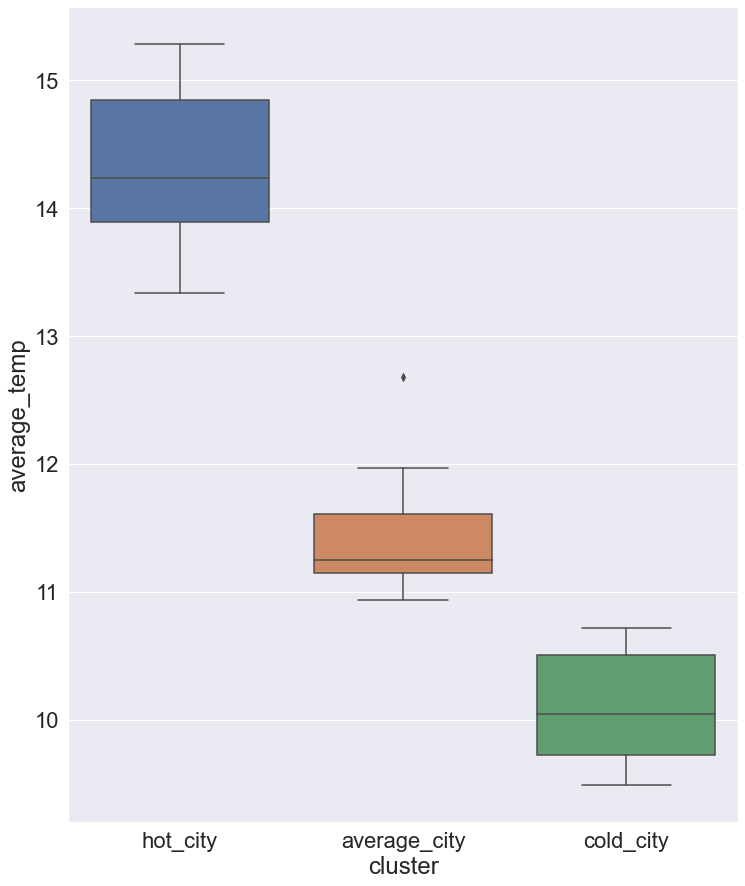

In [26]:
fig = plt.subplots(figsize=(12,15))
sb.boxplot(x='cluster',y='average_temp',data=city,)

#### We will now try to compute an anova between average_temp and cluster columns using bioinfokit
#### from bioinfokit.analys import stat and use stat().anova_stat and stat().anova_summary

In [27]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=city, res_var='average_temp', anova_model='average_temp ~ C(cluster)')
res.anova_summary


#The p value of the ANOVA analysis is significant (p < 0.05) so we conclude that there are significant differences 
#among clusters. We can say that we have a good separation

,df,sum_sq,mean_sq,F,PR(>F)
C(cluster),2.0,95.567282,47.783641,155.536185,6.856758e-16
Residual,28.0,8.602127,0.307219,NaN,NaN


### Now, lets remove bres from data as it is an outlier (import data again and start from here)

In [17]:
import pandas as pd
city = pd.read_csv('villes.csv',sep=';')
city = city[city['ville']!='bres']
city.head()

cities = city.ville
temp = city.drop('ville',axis=1)

### Now compute a kmeans with 2 clusters, compute a pca and vizualize clusters on pca first components (don't forget to normalize data)

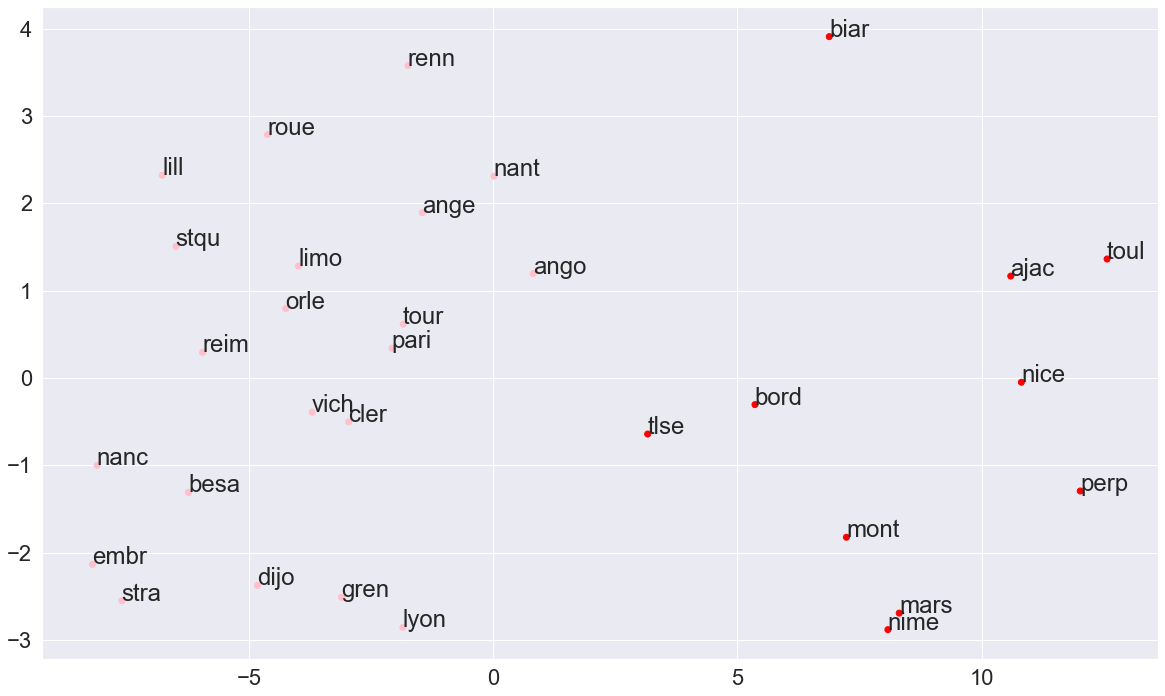

In [18]:
sc = StandardScaler()
X_norm = sc.fit_transform(temp)
KM = KMeans(n_clusters = 2)
KM.fit(X_norm)
clus = KM.labels_

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(temp)
pca_comp = pca.components_

fig,ax=plt.subplots(figsize=(20,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clus, cmap=ListedColormap(colors))
for label, x, y in zip(cities, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

### Now, we weill display correlation disk of the pca and use it in order to interpret the graph above

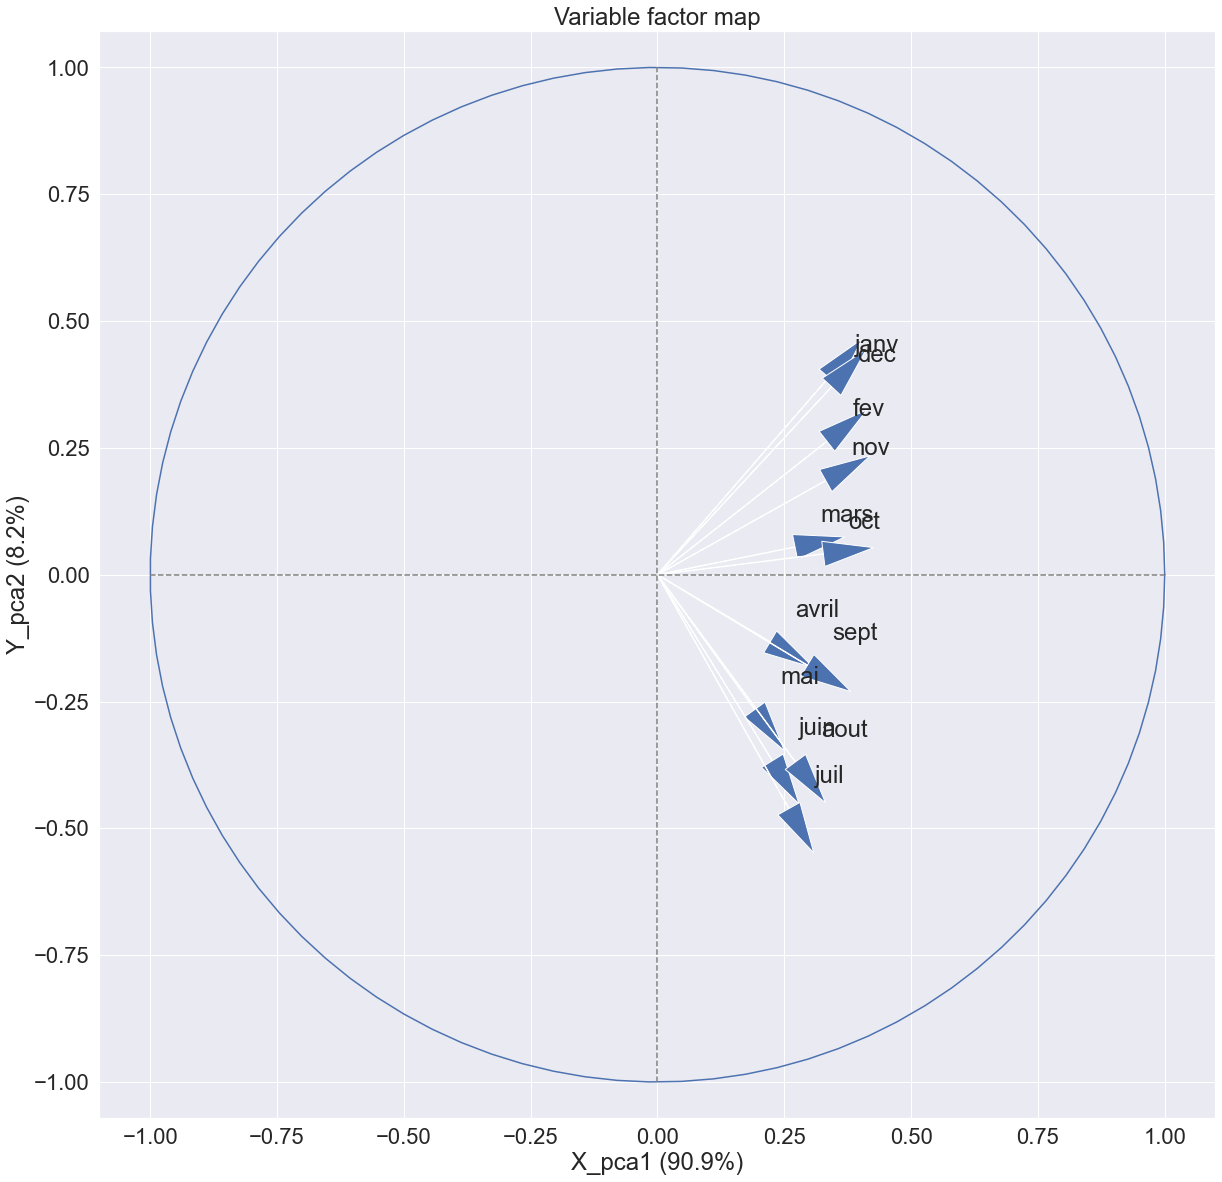

In [19]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(20, 20))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.05,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             temp.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel('X{} ({}%)'.format('_pca1', round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('Y{} ({}%)'.format('_pca2', round(100*pca.explained_variance_ratio_[1],1)))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

### Interpret the correlation circle

### We can see that there is 2 season: 
    -Summer: July, June, August, April, May and September
    -Winter: October, November, December, January, February, March
    
##### Summer variables are positively correlated with X_pca1 comp and negatively correlated with Y_pca2. Which means that when X_pca1 is high, summer features are high and when Y_pca2 is high summer features are low.  
#### Winter variables are positively correlated with X_pca1 comp and positively correlated with Y_pca2

So, coming back to the vizualization of our clusters on pca components, the point situated right bottom of the graph are cities which have high tempearature in winter and in summer and left top are the cities with low temperature in winter and in summer.
Of course in both clusters, we have 'average cities'.

# Congratulation

### You finished the first workshop on clustering. You saw how to apply a clustering, how to evaluate it and how to interpret it in order to give insight to the business. 